In [1]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, BasicAer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [41]:
#provider = IBMQ.get_provider(hub='ibm-q-internal', group='deployed', project='default')
#provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q-internal', group='deployed', project='default')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q-internal', group='deployed', project='default')>,
 <IBMQBackend('ibmq_montreal') from IBMQ(hub='ibm-q-internal', group='deployed', project='default')>,
 <IBMQBackend('ibmq_toronto') from IBMQ(hub='ibm-q-internal', group='deployed', project='default')>,
 <IBMQBackend('ibmq_bogota') from IBMQ(hub='ibm-q-internal', group='deployed', project='default')>,
 <IBMQBackend('ibmq_kolkata') from IBMQ(hub='ibm-q-internal', group='deployed', project='default')>,
 <IBMQBackend('ibmq_mumbai') from IBMQ(hub='ibm-q-internal', group='deployed', project='default')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q-internal', group='deployed', project='default')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q-internal', group='deployed', project='default')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q-internal', group='deployed', project='de

In [2]:

# get the least-busy backend at IBM and run the quantum circuit there
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
#backend = least_busy(provider.backends(filters=lambda b: b.configuration().n_qubits >= 2 and b.status().operational==True and not b.configuration().simulator))
#print(backend)

provider = IBMQ.get_provider(hub='ibm-q-community', group='iisc-hackathon', project='main')
provider.backends()

[<IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q-community', group='iisc-hackathon', project='main')>]

In [35]:
from qiskit import BasicAer
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit.algorithms.optimizers import COBYLA
from qiskit.circuit.library import TwoLocal
from qiskit_machine_learning.algorithms import VQC
from qiskit_machine_learning.datasets import wine
from qiskit_machine_learning.circuit.library import RawFeatureVector
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap, ZFeatureMap, NLocal
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter

from sklearn.metrics import classification_report, confusion_matrix
from time import time
seed = 10599

In [22]:
simulator = BasicAer.get_backend('statevector_simulator')
print(simulator)

statevector_simulator


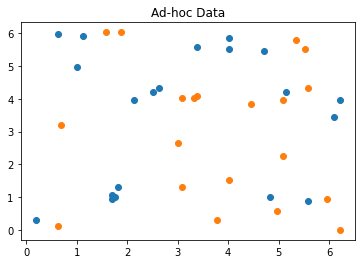

[[2.63893783 4.33539786]
 [4.0212386  5.84336234]
 [0.62831853 5.96902604]
 [4.71238898 5.46637122]
 [2.136283   3.95840674]
 [4.0212386  5.52920307]
 [6.09468975 3.45575192]
 [3.39292007 5.59203492]
 [6.22035345 3.95840674]
 [5.15221195 4.20973416]
 [4.83805269 1.00530965]
 [0.18849556 0.31415927]
 [1.69646003 1.0681415 ]
 [1.69646003 0.9424778 ]
 [1.00530965 4.96371639]
 [1.75929189 1.00530965]
 [5.59203492 0.87964594]
 [1.82212374 1.31946891]
 [2.51327412 4.20973416]
 [1.13097336 5.90619419]
 [5.52920307 5.52920307]
 [3.76991118 0.31415927]
 [1.88495559 6.03185789]
 [5.96902604 0.9424778 ]
 [3.33008821 4.0212386 ]
 [4.0212386  1.50796447]
 [6.22035345 0.        ]
 [0.69115038 3.20442451]
 [5.0893801  3.95840674]
 [1.57079633 6.03185789]
 [3.0787608  1.31946891]
 [0.62831853 0.12566371]
 [5.0893801  2.26194671]
 [3.39292007 4.08407045]
 [3.01592895 2.63893783]
 [5.34070751 5.78053048]
 [4.96371639 0.56548668]
 [4.46106157 3.83274304]
 [5.59203492 4.33539786]
 [3.0787608  4.0212386 ]]

In [46]:
from qiskit_machine_learning.datasets import ad_hoc_data

feature_dim = 2
train_data, train_labels, test_data, test_labels = ad_hoc_data(
    training_size=20,
    test_size=10,
    n=feature_dim,
    gap=0.3,
    plot_data=True
)
print(train_data)
print(train_labels)
print(len(train_data))
print(test_data)
print(test_labels)
print(len(test_data))

#extra_test_data = ad_hoc_data(sample_total, 10, n=feature_dim)
#datapoints, class_to_label = split_dataset_to_data_and_labels(extra_test_data)
#print(class_to_label)

In [ ]:
feature_map = ZZFeatureMap(feature_dimension=feature_dim, reps=1)
ansatz = TwoLocal(feature_dim, ['ry', 'rz'], 'cz', reps=1)
vqc = VQC(feature_map=feature_map,
                 ansatz=ansatz,
                 optimizer=COBYLA(maxiter=1),
                 quantum_instance=QuantumInstance(backend=backend,shots=1,
                                                 seed_simulator=seed,
                                                 seed_transpiler=seed)
         )
start_time = time()
vqc.fit(train_data, train_labels)
end_time = time()
duration = end_time - start_time
print("training time for VQC : ", duration)
result = vqc.predict(test_data)


/opt/conda/lib/python3.8/site-packages/qiskit/utils/run_circuits.py:745: UserWarning: seed_simulator is not a recognized runtime option and may be ignored by the backend.
  return backend.run(circuits, **run_kwargs)


training time for VQC :  29.651851892471313


In [37]:
result2=np.delete(result,1,1)
test_labels2=np.delete(test_labels,1,1)

In [39]:
print(classification_report(test_labels,result))
print(confusion_matrix(test_labels2,result2))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        10
           1       0.77      1.00      0.87        10

   micro avg       0.85      0.85      0.85        20
   macro avg       0.88      0.85      0.85        20
weighted avg       0.88      0.85      0.85        20
 samples avg       0.85      0.85      0.85        20

[[10  0]
 [ 3  7]]


In [ ]:
more_test_data = sample_ad_hoc_data(sample_total, 10, n=feature_dim)
more_datapoints, _ = split_dataset_to_data_and_labels(more_test_data)

predicted_probabilities, predicted_labels = vqc.predict(datapoints[0])

print('Prediction from more_datapoints set:')
print(f'  ground truth: {map_label_to_class_name(more_datapoints[1], vqc.label_to_class)}')
print(f'  prediction:   {map_label_to_class_name(predicted_labels, vqc.label_to_class)}')
print(f'  success rate: {100*np.count_nonzero(predi